In [182]:
# Moro Aki, tästä lähtee taas notebook rakentumaan. Tuodaan kirjastot ja määritän tyylin, sekä teen oletusarvoisen koon
# kuvaajille

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('seaborn-darkgrid')

plt.rcParams["figure.figsize"] = (20,10)

In [183]:
# Avataan tiedostot ohjeiden mukaan. Tiedostoissa kolmen vuoden ajalta osakekurssikehitys ja muita lukuja. Valitsin Digian
# ja Siilen, olen niihin joskus itse sijoittanut ja ovat samalla alalla.

digia = pd.read_csv('digia.csv', sep=';', decimal=',', skiprows=1)
siili = pd.read_csv('siili.csv', sep=';', decimal=',', skiprows=1)

In [184]:
# Tarkistus

siili.head()

,Date,Bid,Ask,Opening price,High price,Low price,Closing price,Average price,Total volume,Turnover,Trades,Unnamed: 11
0,2020-02-28,9.32,9.40,9.50,9.94,9.28,9.40,9.465,30799,291507.48,249,NaN
1,2020-02-27,8.82,8.94,9.12,9.20,8.56,8.96,8.917,25956,231451.80,163,NaN
2,2020-02-26,8.94,9.00,8.80,9.00,8.50,9.00,8.683,24483,212595.86,142,NaN
3,2020-02-25,8.90,9.00,8.90,9.18,8.84,9.00,8.941,20235,180913.40,109,NaN
4,2020-02-24,8.96,9.00,9.68,9.68,9.02,9.02,9.257,12130,112286.86,104,NaN


In [185]:
# Poistetaan tuo ns. ylimääräinen sarake

digia.drop('Unnamed: 11', axis=1, inplace=True)
siili.drop('Unnamed: 11', axis=1, inplace=True)

In [186]:
digia.head()

,Date,Bid,Ask,Opening price,High price,Low price,Closing price,Average price,Total volume,Turnover,Trades
0,2020-02-28,4.52,4.53,4.27,4.73,4.27,4.55,4.365,52146.0,227635.11,225
1,2020-02-27,4.41,4.42,4.56,4.56,4.41,4.42,4.457,11390.0,50762.26,66
2,2020-02-26,4.56,4.61,4.50,4.69,4.30,4.56,4.353,75671.0,329416.61,322
3,2020-02-25,4.52,4.55,4.60,4.60,4.50,4.52,4.553,67489.0,307253.10,227
4,2020-02-24,4.65,4.73,4.97,4.97,4.45,4.64,4.678,85055.0,397870.34,335


In [187]:
# Tässä teen ohjeiden mukaan datetimellä aikaindeksin

digia.index = pd.to_datetime(digia['Date'])
digia.sort_index(inplace=True)

siili.index = pd.to_datetime(siili['Date'])
siili.sort_index(inplace=True)

In [188]:
digia.head()

,Date,Bid,Ask,Opening price,High price,Low price,Closing price,Average price,Total volume,Turnover,Trades
Date,,,,,,,,,,,
2017-01-02,2017-01-02,3.020,3.077,3.001,3.048,3.001,3.048,3.034,10652.358542,32318.10,29
2017-01-03,2017-01-03,3.048,3.067,3.048,3.048,3.020,3.020,3.039,6816.375679,20712.01,19
2017-01-04,2017-01-04,3.020,3.029,3.077,3.077,3.010,3.029,3.031,13494.177264,40896.21,26
2017-01-05,2017-01-05,3.020,3.029,3.029,3.029,3.001,3.010,3.022,10288.076644,31094.01,29
2017-01-09,2017-01-09,3.001,3.029,3.029,3.029,3.001,3.001,3.016,7435.759885,22424.92,18


In [189]:
digia.describe().round()

,Bid,Ask,Opening price,High price,Low price,Closing price,Average price,Total volume,Turnover,Trades
count,792.0,792.0,792.0,792.0,792.0,792.0,792.0,792.0,792.0,792.0
mean,3.0,3.0,3.0,3.0,3.0,3.0,3.0,28199.0,81946.0,50.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,76319.0,210449.0,59.0
min,2.0,2.0,2.0,2.0,2.0,2.0,2.0,292.0,738.0,4.0
25%,3.0,3.0,3.0,3.0,3.0,3.0,3.0,7706.0,21399.0,22.0
50%,3.0,3.0,3.0,3.0,3.0,3.0,3.0,13142.0,37757.0,33.0
75%,3.0,3.0,3.0,3.0,3.0,3.0,3.0,23981.0,72494.0,54.0
max,5.0,5.0,5.0,5.0,5.0,5.0,5.0,1043652.0,3112250.0,793.0


In [190]:
siili.describe().round()

,Bid,Ask,Opening price,High price,Low price,Closing price,Average price,Total volume,Turnover,Trades
count,792.0,792.0,792.0,792.0,792.0,792.0,792.0,792.0,792.0,792.0
mean,10.0,10.0,10.0,10.0,10.0,10.0,10.0,6245.0,63090.0,33.0
std,1.0,2.0,2.0,2.0,1.0,1.0,1.0,9937.0,101899.0,32.0
min,8.0,8.0,8.0,8.0,8.0,8.0,8.0,1.0,12.0,1.0
25%,9.0,9.0,9.0,9.0,9.0,9.0,9.0,1628.0,15878.0,15.0
50%,10.0,10.0,10.0,10.0,10.0,10.0,10.0,3530.0,36556.0,25.0
75%,12.0,12.0,12.0,12.0,11.0,12.0,12.0,7350.0,72073.0,41.0
max,13.0,13.0,13.0,13.0,13.0,13.0,13.0,120582.0,1357182.0,516.0


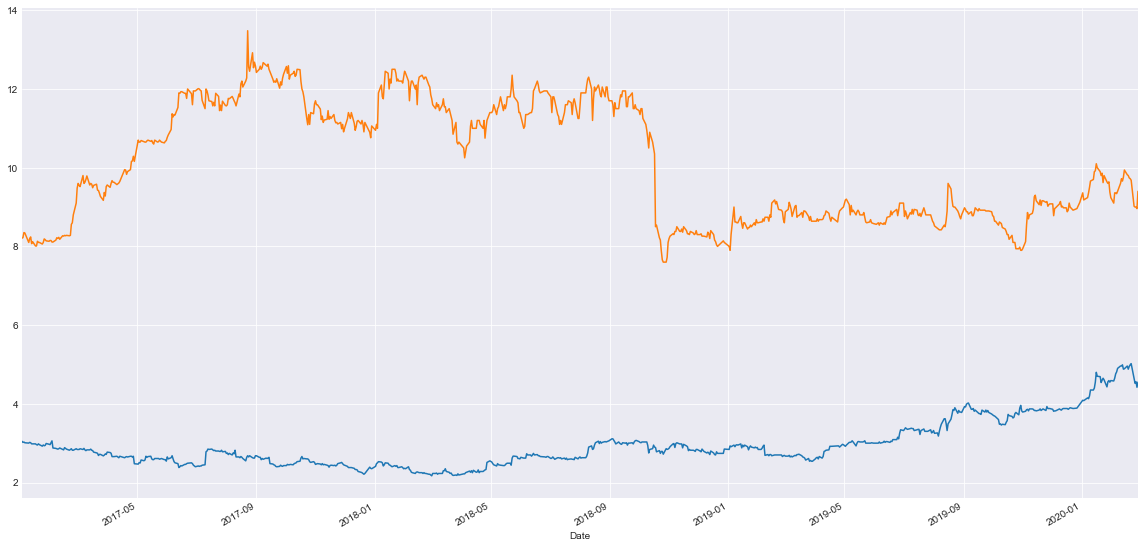

In [191]:
# Plottaan osakkeen kauppapäivän sulkeutumishintaa. Yhdistän Digian ja Siilen samaan ihan tilan takia.

digia['Closing price'].plot()
siili['Closing price'].plot()

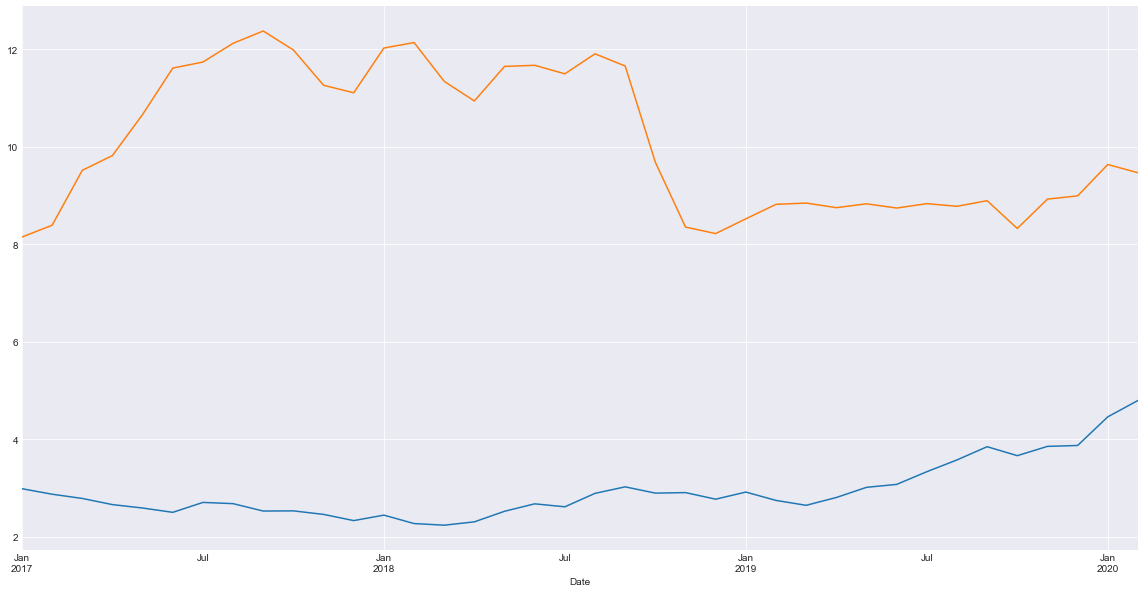

In [192]:
# Kuukausittain

digia['Closing price'].resample('M').mean().plot()
siili['Closing price'].resample('M').mean().plot()

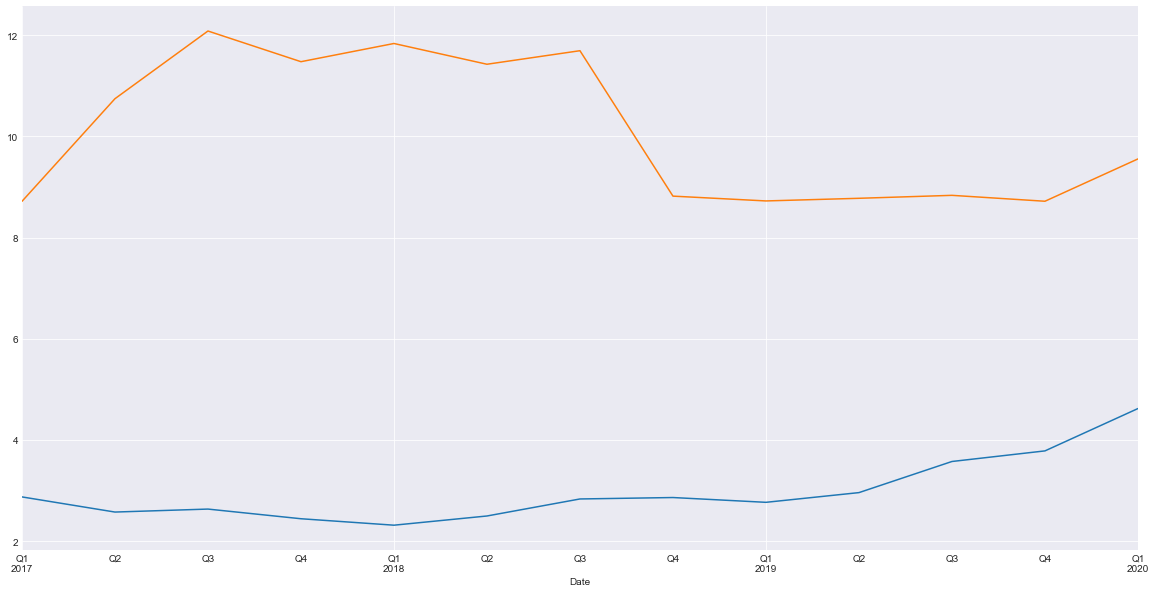

In [193]:
# Kvartaaleittain

digia['Closing price'].resample('Q').mean().plot()
siili['Closing price'].resample('Q').mean().plot()

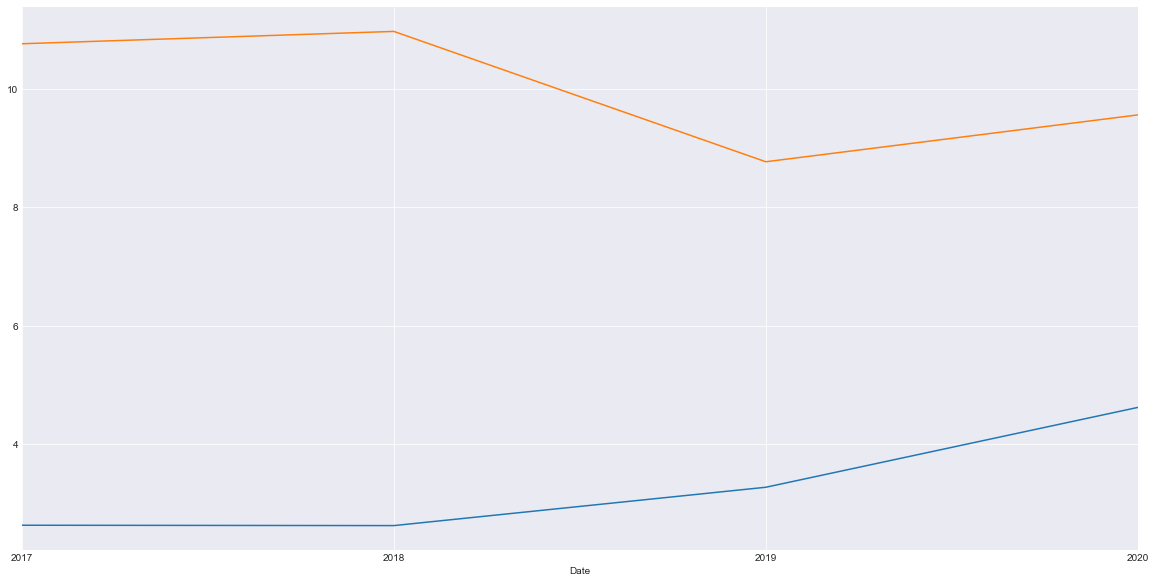

In [194]:
# Vuosittain

digia['Closing price'].resample('Y').mean().plot()
siili['Closing price'].resample('Y').mean().plot()

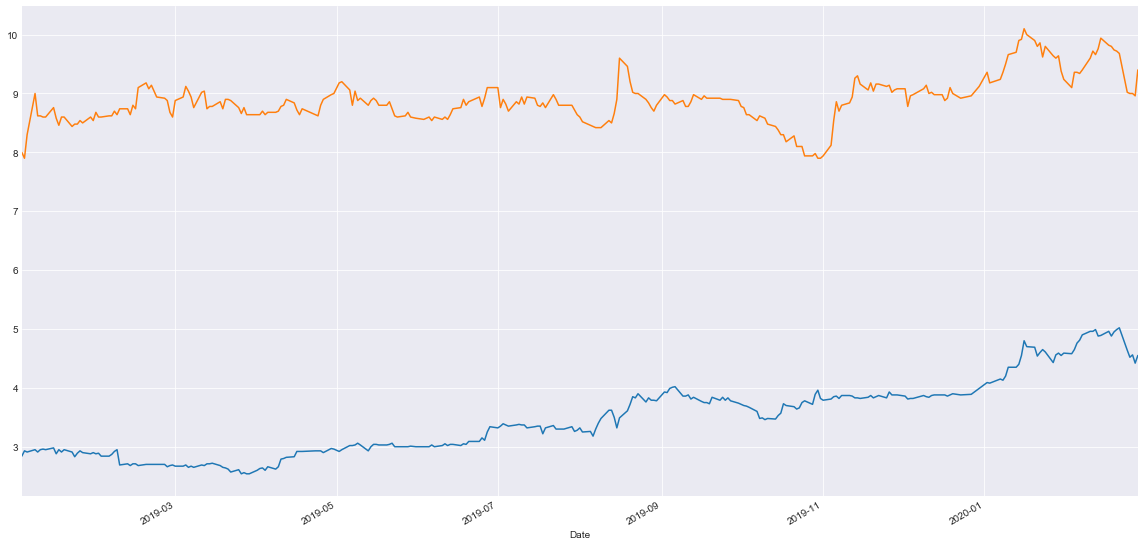

In [195]:
# Tässä ohjeiden mukaan tietystä aikapisteestä alkaen

digia['Closing price']['2019':].plot()
siili['Closing price']['2019':].plot()

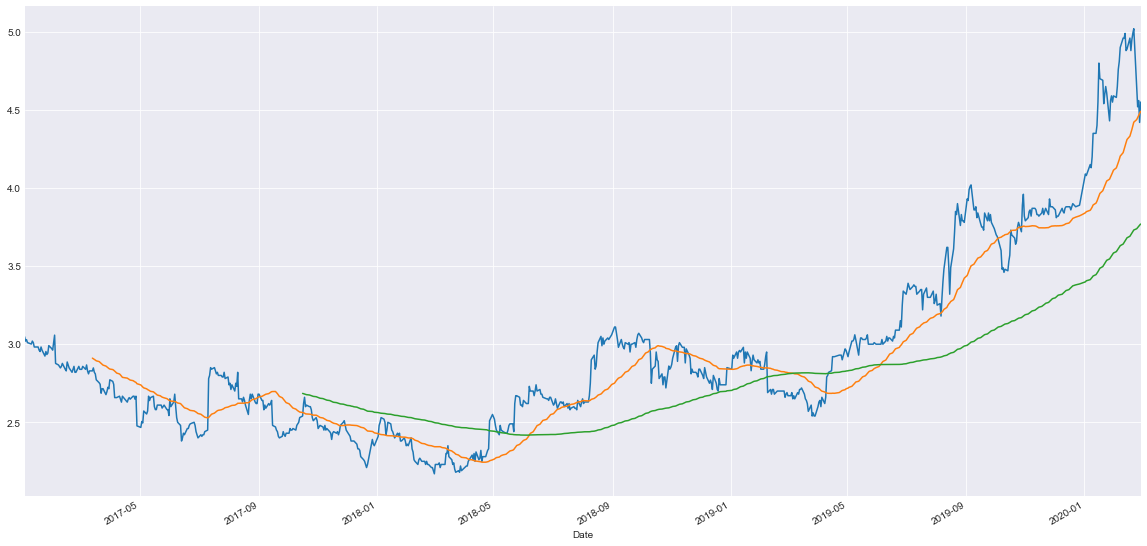

In [196]:
# Tässä nämä liukuvat keskiarvot. Kuoleman ristit löytyvät, ja aika hyvin menevät osakkeen arvonmuutoksen kanssa
# samoihin

digia['Closing price'].plot()

digia['Closing price'].rolling(50).mean().plot()
digia['Closing price'].rolling(200).mean().plot()

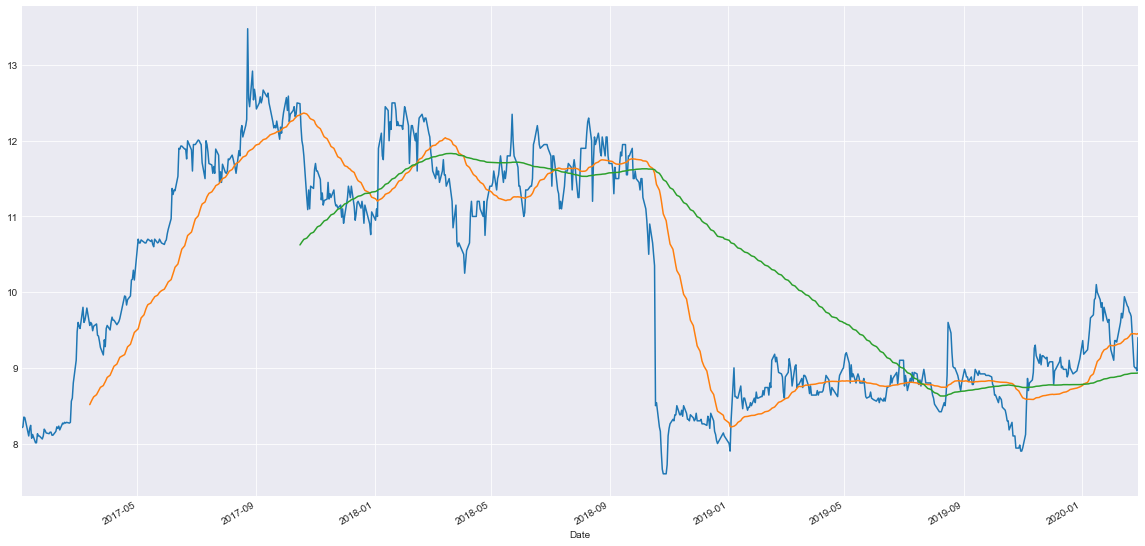

In [197]:
# Tässä sama Siilen osalta

siili['Closing price'].plot()

siili['Closing price'].rolling(50).mean().plot()
siili['Closing price'].rolling(200).mean().plot()

In [218]:
# Tässä luodaan prosenttimuutos-sarake

digia['Digia%'] = digia['Closing price'].pct_change()
siili['Siili%'] = siili['Closing price'].pct_change()

In [199]:
digia.head()

,Date,Bid,Ask,Opening price,High price,Low price,Closing price,Average price,Total volume,Turnover,Trades,Digia%
Date,,,,,,,,,,,,
2017-01-02,2017-01-02,3.020,3.077,3.001,3.048,3.001,3.048,3.034,10652.358542,32318.10,29,NaN
2017-01-03,2017-01-03,3.048,3.067,3.048,3.048,3.020,3.020,3.039,6816.375679,20712.01,19,-0.009186
2017-01-04,2017-01-04,3.020,3.029,3.077,3.077,3.010,3.029,3.031,13494.177264,40896.21,26,0.002980
2017-01-05,2017-01-05,3.020,3.029,3.029,3.029,3.001,3.010,3.022,10288.076644,31094.01,29,-0.006273
2017-01-09,2017-01-09,3.001,3.029,3.029,3.029,3.001,3.001,3.016,7435.759885,22424.92,18,-0.002990


In [200]:
# Yhdistetään prosenttimuutokset omaan dataframeensa

muutos = pd.concat([digia['Digia%'], siili['Siili%']], axis=1)
muutos.head()

,Digia%,Siili%
Date,,
2017-01-02,NaN,NaN
2017-01-03,-0.009186,0.001218
2017-01-04,0.002980,0.015815
2017-01-05,-0.006273,-0.001198
2017-01-09,-0.002990,-0.028777


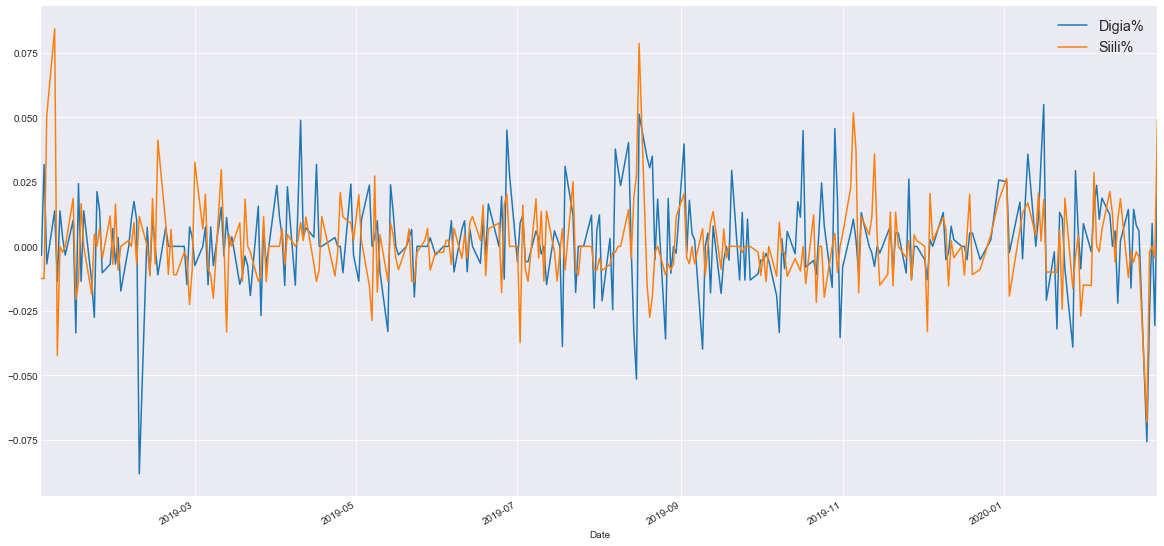

In [201]:
# Tässä vertaillaan Digian ja Siilen osakkeiden arvon muutosta

muutos['2019':].plot()
plt.legend(fontsize='x-large')

In [202]:
muutos.describe()

,Digia%,Siili%
count,791.000000,791.000000
mean,0.000658,0.000331
std,0.017453,0.017773
min,-0.088136,-0.178744
25%,-0.008114,-0.008811
50%,0.000000,0.000000
75%,0.008550,0.008734
max,0.134694,0.097720


In [203]:
# Videon mukaan katsotaan minä päivinä on muutosta ollut yli 5%

muutos[(abs(muutos['Digia%'])>0.05)|(abs(muutos['Siili%'])>0.05)]

,Digia%,Siili%
Date,,
2017-02-03,-0.059189,0.000000
2017-04-28,-0.071241,-0.012634
2017-05-02,-0.004037,0.053150
2017-07-11,0.134694,0.043478
2017-08-11,-0.060284,-0.006867
2017-08-23,0.015152,0.097720
2017-08-24,-0.011194,-0.068249
2017-09-15,-0.060606,-0.004800
2017-12-27,0.071749,-0.022422


In [204]:
# Korrelaatiota ei osakkeiden arvonvaihtelun välillä kauheasti ole

muutos.corr()

,Digia%,Siili%
Digia%,1.0000,0.1649
Siili%,0.1649,1.0000


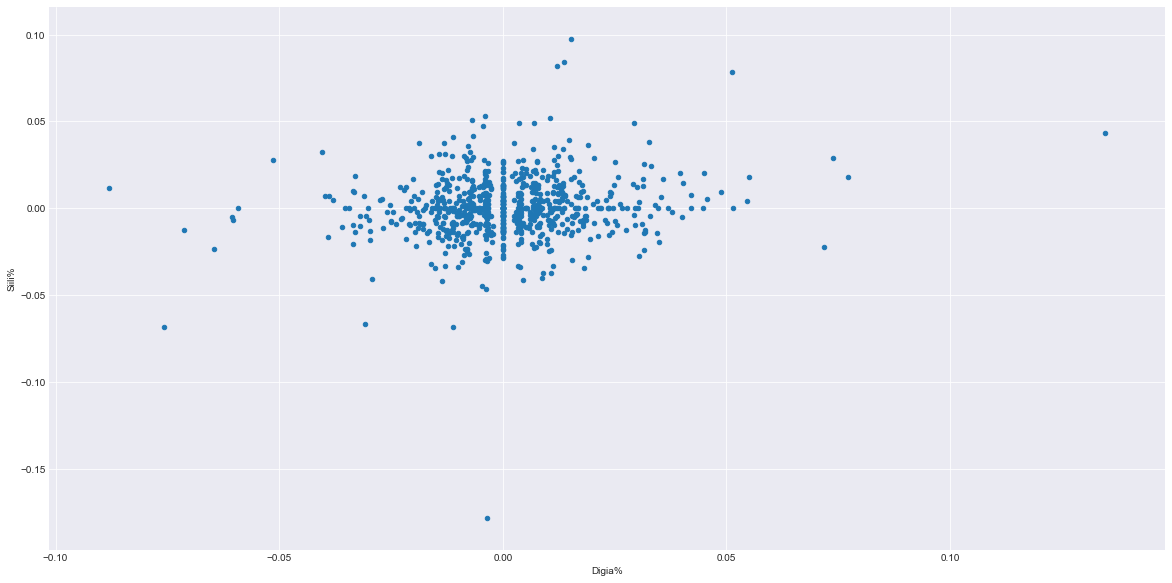

In [205]:
# Scatterplotissa näkyy myös korrelaation pienuus. Kuvion on kylläkin aika jännä.

muutos.plot.scatter(x='Digia%', y='Siili%')

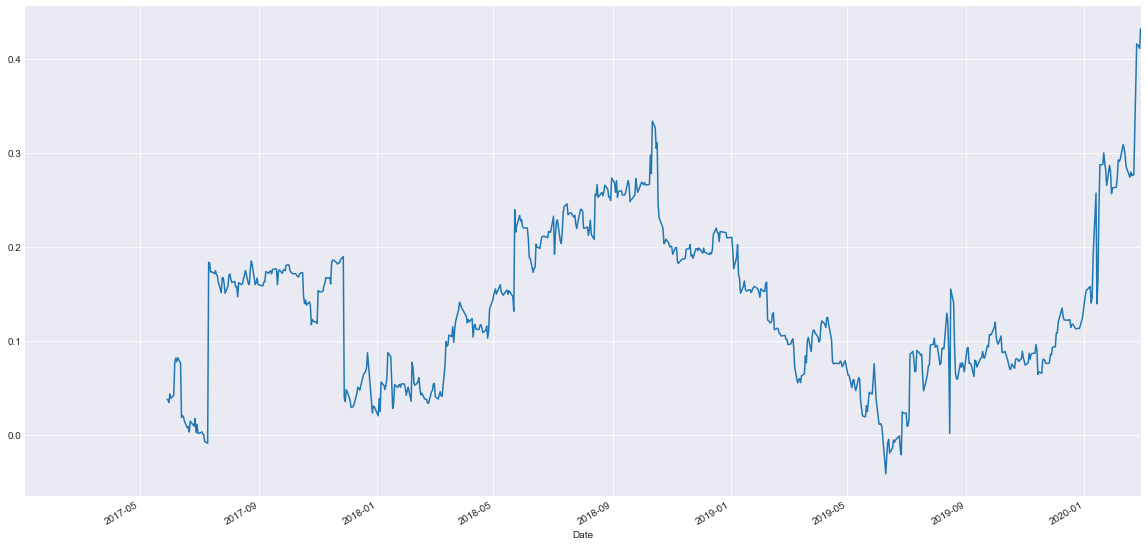

In [220]:
# Korrelaation muutos ajan myötä. Käyrä näyttää että korrelaatio on lisääntynyt voimakkaasti kun tullaan nykyhetkeen.

muutos['Digia%'].rolling(100).corr(muutos['Siili%']).plot()

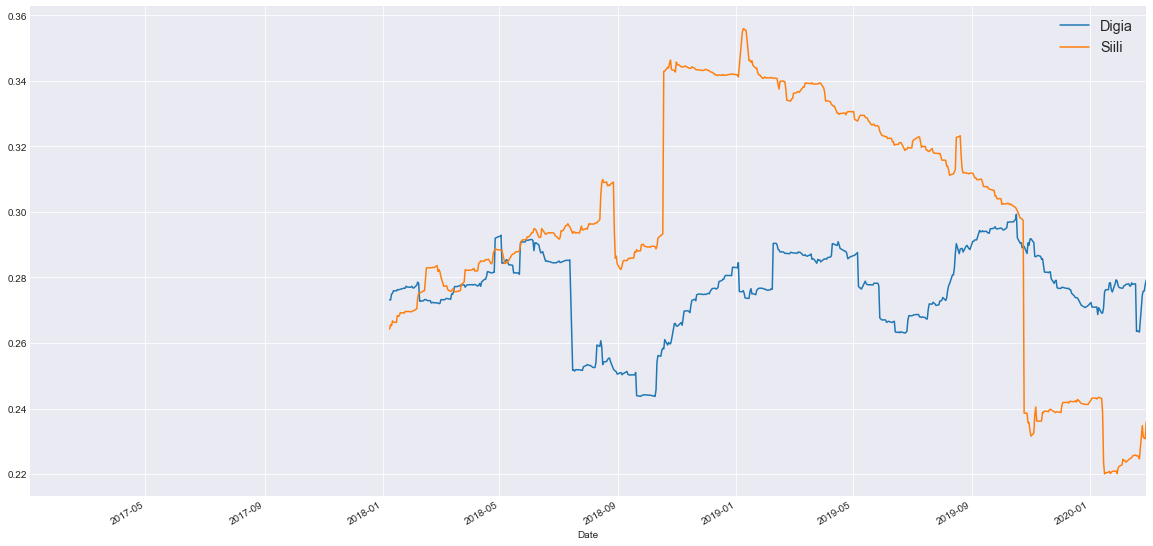

In [207]:
# Volatiliteetti

(muutos['Digia%']['2017':].rolling(255).std()*(255**0.5)).plot(label='Digia', legend=True)
(muutos['Siili%']['2017':].rolling(255).std()*(255**0.5)).plot(label='Siili', legend=True)

plt.legend(fontsize='x-large')

In [208]:
# Onko viikonpäivällä vaikutusta arvonvaihteluun

muutos['Viikonpäivä'] = muutos.index.weekday
muutos.groupby('Viikonpäivä')['Digia%'].describe()

,count,mean,std,min,25%,50%,75%,max
Viikonpäivä,,,,,,,,
0,155.0,-0.000475,0.014924,-0.075697,-0.008267,0.0,0.007305,0.051471
1,159.0,-0.000028,0.018249,-0.040323,-0.008282,0.0,0.007466,0.134694
2,160.0,0.002084,0.016236,-0.034364,-0.007233,0.0,0.010588,0.073770
3,160.0,0.000906,0.017271,-0.064626,-0.008909,0.0,0.010068,0.054945
4,157.0,0.000765,0.020219,-0.088136,-0.007853,0.0,0.008299,0.077253


(0, 20)

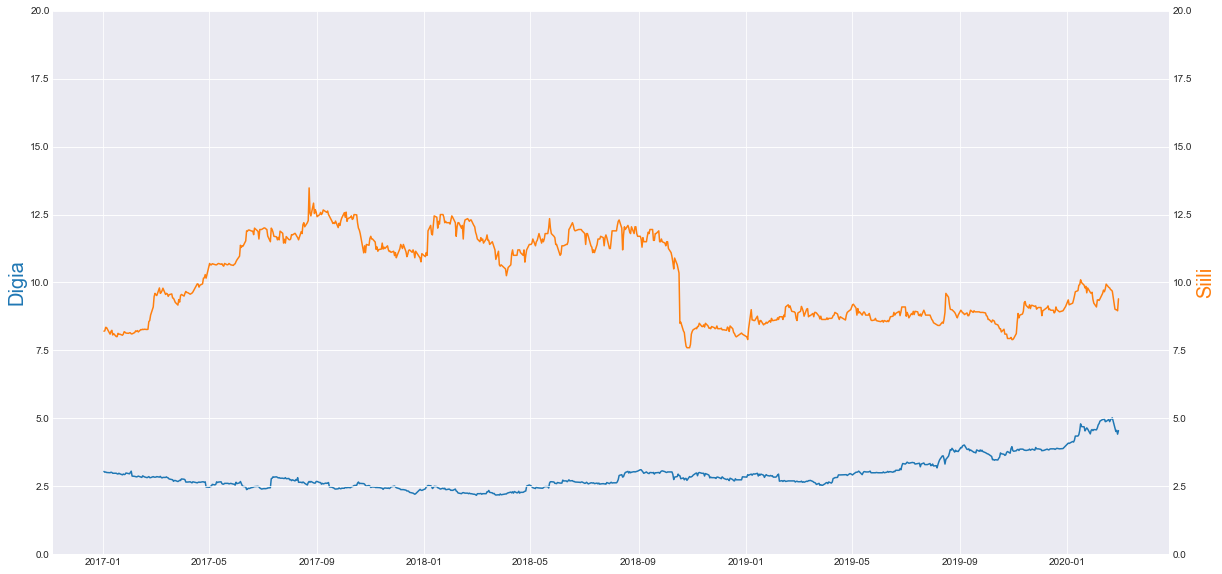

In [217]:
# Vielä osakkeen hinnat kahdella eri akselilla.

fig, ax = plt.subplots(figsize = (20, 10))

ax.set_ylabel('Digia', color='C0', fontsize=20)
ax.plot(digia['Closing price'], color='C0')
ax.set_ylim(0,20)

ax_T = ax.twinx()

ax_T.set_ylabel('Siili', color='C1', fontsize=20)
ax_T.plot(siili['Closing price'], color='C1')
ax_T.set_ylim(0,20)

